In [ ]:
!pip install mplcyberpunk
!pip install python-bcb

In [ ]:
import mplcyberpunk
import seaborn as sns
import pandas as pd
from bcb import sgs
import statsmodels.api as sm
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import matplotlib.dates as mdates
from matplotlib.dates import date2num
from datetime import datetime
from datetime import timedelta
plt.style.use("cyberpunk")

In [ ]:
import numpy as np
from pandas.plotting import autocorrelation_plot
from matplotlib import pyplot
import pandas.util.testing as tm
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from matplotlib import pyplot

<ipython-input-3-533cb06baa56>:4: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
df_outros = pd.read_csv('/content/drive/MyDrive/Dados/convenio_OUTROS.csv', sep=';')
df_outros['Data'] = pd.to_datetime(df_outros['Data'], format='%d/%m/%Y')

In [ ]:
df_outros.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31 entries, 0 to 30
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Data       31 non-null     datetime64[ns]
 1   ValorBase  31 non-null     object        
dtypes: datetime64[ns](1), object(1)
memory usage: 624.0+ bytes


In [ ]:
# Remover vírgula e converter coluna para float
df_outros['ValorBase'] = df_outros['ValorBase'].str.replace(',', '.').astype(float)

In [ ]:
df_outros.head(4)

,Data,ValorBase
0,2020-12-01,8000.00
1,2021-01-01,15521152.49
2,2021-02-01,10992876.72
3,2021-03-01,17470762.77


In [ ]:
df_outros.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31 entries, 0 to 30
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Data       31 non-null     datetime64[ns]
 1   ValorBase  31 non-null     float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 624.0 bytes


# MODELO ARIMA OUTROS TREINO/TESTE

In [ ]:
train_size = int(len(df_outros.ValorBase) * 2 / 3)

20

In [ ]:
train_set = df_outros.ValorBase[:train_size]
test_set = df_outros.ValorBase[train_size:]

In [ ]:
train_set.shape, test_set.shape

((20,), (11,))

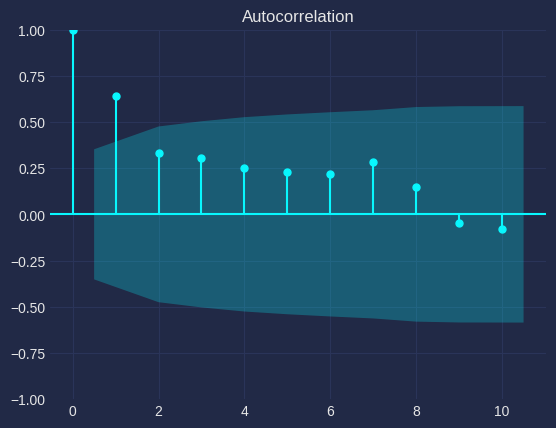

In [ ]:
plot_acf(df_outros.ValorBase, lags=10)
pyplot.show()

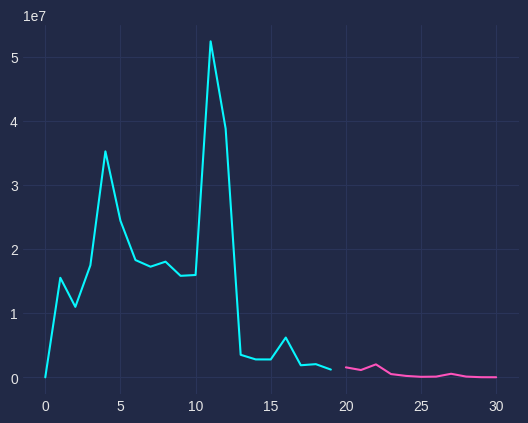

In [ ]:
plt.plot(train_set)
plt.plot(test_set)

In [ ]:
from statsmodels.tsa.ar_model import AR
from statsmodels.tsa.ar_model import AutoReg

ar_2 = AutoReg(train_set, lags=2).fit()
ar_2.params

const           9.309661e+06
ValorBase.L1    6.599306e-01
ValorBase.L2   -2.692619e-01
dtype: float64

In [ ]:
previsoes = ar_2.params[0] + test_set.shift(2) * ar_2.params[1] + test_set.shift(2) * ar_2.params[1]

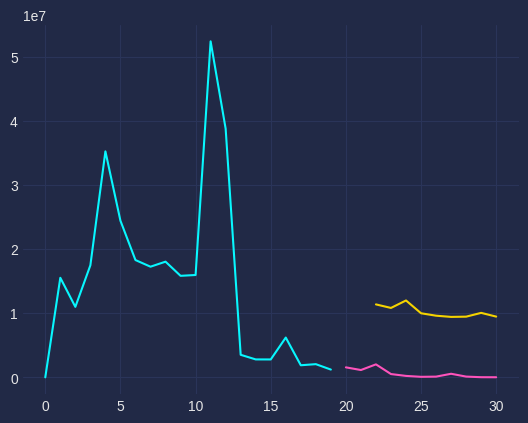

In [ ]:
plt.plot(train_set)
plt.plot(test_set)
plt.plot(previsoes)

In [ ]:
previsoes = ar_2.params[0]
for i, param in enumerate(ar_2.params[1:]):
    previsoes += test_set.shift(i + 1) * param
previsoes

20             NaN
21             NaN
22    9.645167e+06
23    1.034001e+07
24    9.105675e+06
25    9.322114e+06
26    9.305974e+06
27    9.363393e+06
28    9.650463e+06
29    9.239505e+06
30    9.295611e+06
Name: ValorBase, dtype: float64

In [ ]:
((test_set - previsoes) ** 2).mean()

97302164856495.3

# PREVISÕES SARIMAX CONVENIO OUTROS

In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [ ]:
# Converter coluna de datas para o tipo datetime
df_outros['Data'] = pd.to_datetime(df_outros['Data'])

# Definir a coluna 'Data' como o índice do DataFrame
df_outros.set_index('Data', inplace=True)

In [ ]:
sarima = SARIMAX(df_outros.ValorBase, freq='MS', order=(1, 0, 1), seasonal_order=(3, 1, 1, 12)).fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


In [ ]:
print((sarima.resid).mean())

2012670.3636705582


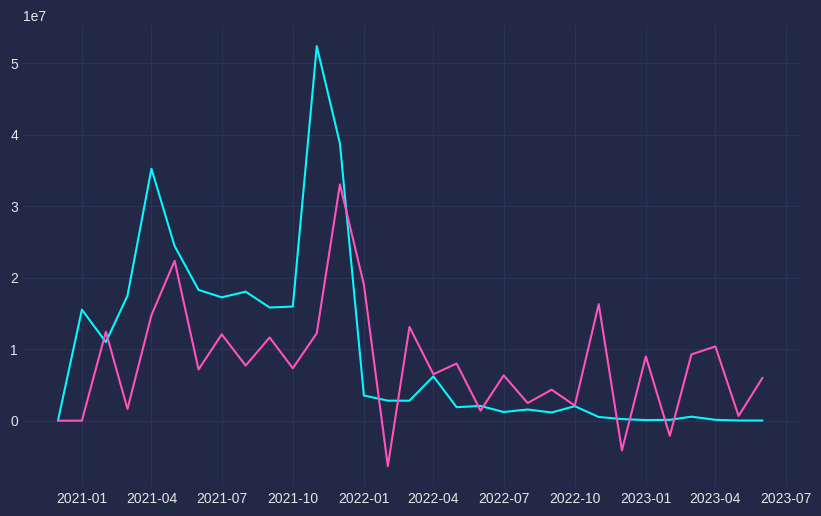

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(df_outros.ValorBase)
plt.plot(sarima.predict(typ='levels'))

In [ ]:
# Resultado da previsão

sarima.forecast().round()

2023-07-01    2194698.0
Freq: MS, dtype: float64

In [ ]:
df_outros.tail(5)

,ValorBase
Data,
2023-02-01,117529.0
2023-03-01,564374.0
2023-04-01,123965.0
2023-05-01,29289.0
2023-06-01,22336.0


# PREVISÕES COM ARIMA CONVENIO OUTROS

In [ ]:
from statsmodels.tsa.arima.model import ARIMA

In [ ]:
arima = ARIMA(df_outros['ValorBase'], order=(1, 1, 0))
arima_fit = arima.fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [ ]:
# Calcular o quadrado dos resíduos médios
mse = (arima_fit.resid).mean()
print(mse)

749.6431899484927


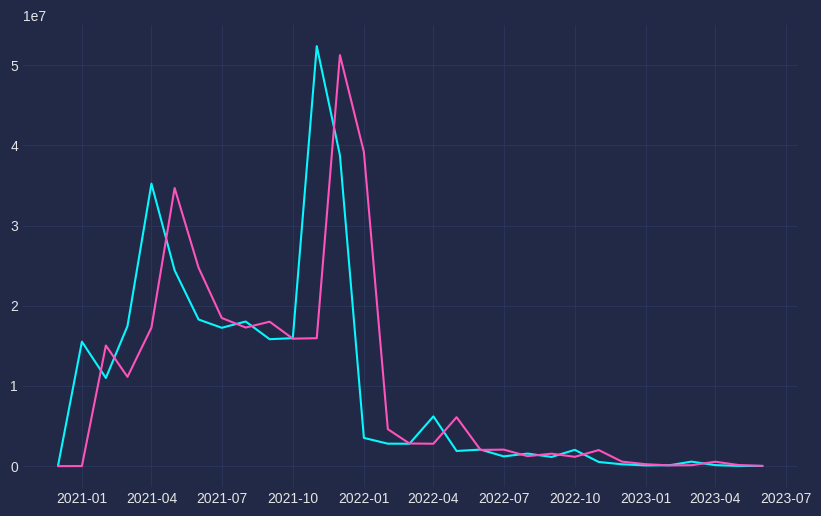

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(df_outros.ValorBase)
plt.plot(arima_fit.predict(typ='levels'))

In [ ]:
# Resultado
previsão = (arima_fit.forecast(steps=6).round())
arima_fit.forecast(steps=6).round()

2023-07-01    22550.0
2023-08-01    22544.0
2023-09-01    22544.0
2023-10-01    22544.0
2023-11-01    22544.0
2023-12-01    22544.0
Freq: MS, Name: predicted_mean, dtype: float64

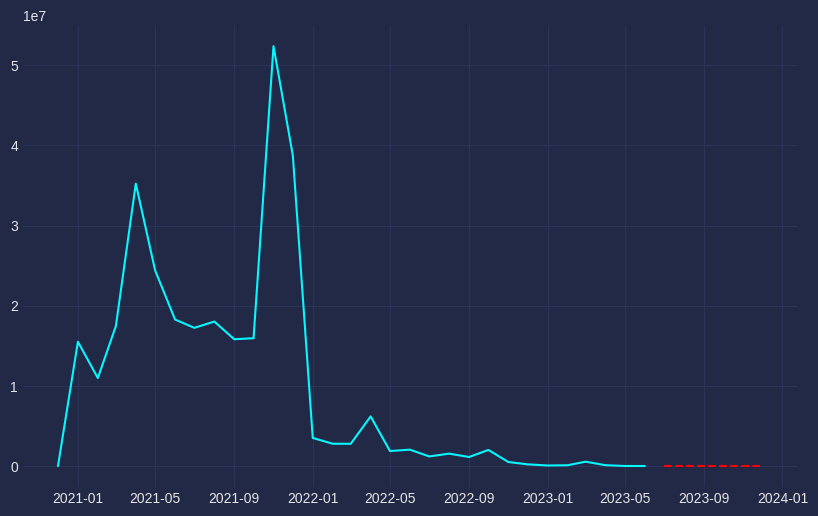

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(df_outros.ValorBase)
plt.plot(previsão, color='red', linestyle='--', label='Previsão')

In [ ]:
df_outros.tail(10).mean()

ValorBase    487207.7
dtype: float64